In [4]:
import numpy as np
import matplotlib.pyplot as plt

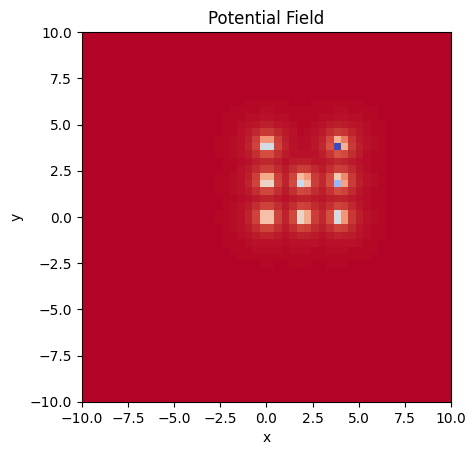

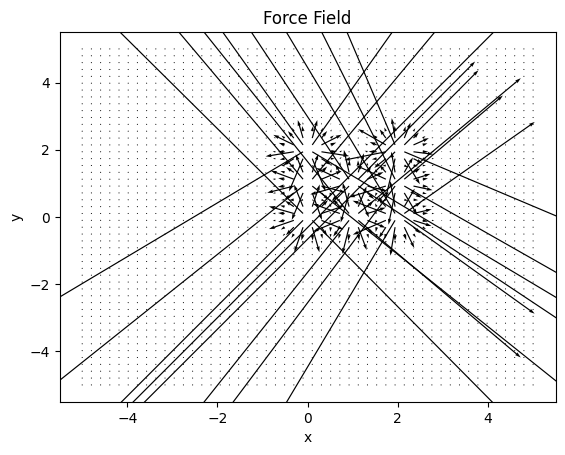

In [38]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np

class PotentialField:
    def __init__(self, pos_pos, neg_pos, k=1):
        self.pos_pos = pos_pos
        self.neg_pos = neg_pos
        self.k = k
    
    def potential(self, x):
        dists_pos = np.linalg.norm(self.pos_pos - x, axis=1)
        dists_neg = np.linalg.norm(self.neg_pos - x, axis=1)
        dists = np.concatenate((dists_pos, dists_neg))
        closest_dist = np.min(dists)
        if closest_dist == 0:
            return float('inf')
        potential_val = -self.k * (1 / closest_dist**2)
        return potential_val
    
    def force(self, x):
        dists_pos = np.linalg.norm(self.pos_pos - x, axis=1)
        dists_neg = np.linalg.norm(self.neg_pos - x, axis=1)
        dists = np.concatenate((dists_pos, dists_neg))
        closest_indices = np.argsort(dists)[:3]
        closest_points = np.concatenate((self.pos_pos, self.neg_pos))[closest_indices]
        closest_dists = dists[closest_indices]
        if np.any(x == closest_points):
            return np.zeros(x.shape)
        force_vec = np.zeros(x.shape)
        for i in range(3):
            force_vec += 2 * self.k * (x - closest_points[i]) / (closest_dists[i]**4)
        return force_vec


# Create some dummy data
np.random.seed(123)
n_pos = 10
n_neg = 5
pos_points = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])
neg_points = np.array([
    [0, 2],
    [2, 2],
    [2, 0],
    [2, 1], 
])  

# Create a PotentialField object
pf = PotentialField(pos_points, neg_points, k=1)

# Compute potential and force fields on a grid
grid_size = 50
x = np.linspace(-5, 5, grid_size)
y = np.linspace(-5, 5, grid_size)
X, Y = np.meshgrid(x, y)
positions = np.vstack([X.ravel(), Y.ravel()]).T
potentials = np.array([pf.potential(pos) for pos in positions]).reshape(grid_size, grid_size)
forces = np.array([pf.force(pos) for pos in positions]).reshape(grid_size, grid_size, 2)

# Plot the potential field
fig, ax = plt.subplots()
ax.imshow(potentials, extent=(-10, 10, -10, 10), origin='lower', cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Potential Field')
plt.show()

# Plot the force field
fig, ax = plt.subplots()
ax.quiver(X, Y, forces[:,:,0], forces[:,:,1])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Force Field')
plt.show()


## LDA 

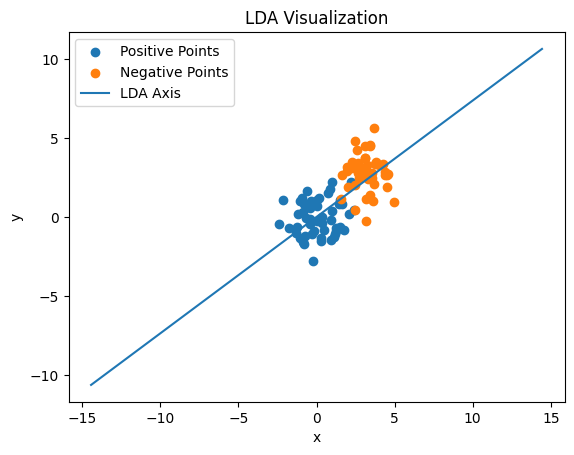

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Generate two point clouds
n_samples = 50
pos_points = np.random.normal(loc=[0, 0], scale=[1, 1], size=(n_samples, 2))
neg_points = np.random.normal(loc=[3, 3], scale=[1, 1], size=(n_samples, 2))

# Concatenate the point clouds and labels
X = np.concatenate((pos_points, neg_points))
y = np.concatenate((np.ones(n_samples), np.zeros(n_samples)))

# Compute LDA and project points onto the LDA axis
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
lda_axis = lda.coef_.flatten()
X_lda = np.dot(X, lda_axis)

# Visualize the results
fig, ax = plt.subplots()
ax.scatter(pos_points[:, 0], pos_points[:, 1], label='Positive Points')
ax.scatter(neg_points[:, 0], neg_points[:, 1], label='Negative Points')
ax.plot([-5*lda_axis[0], 5*lda_axis[0]], [-5*lda_axis[1], 5*lda_axis[1]], label='LDA Axis')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('LDA Visualization')
plt.show()


## Gravitation field 

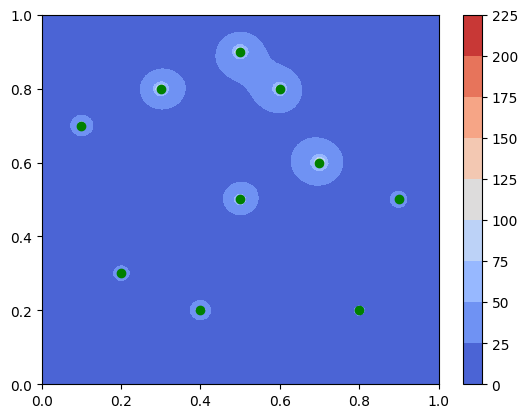

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Define potential function
def potential(q, p, w):
    return w / np.sqrt((q[0]-p[0])**2 + (q[1]-p[1])**2)

# Define positive labeled points and their weights
points = np.array([[0.5, 0.5], [0.3, 0.8], [0.7, 0.6], [0.2, 0.3], [0.8, 0.2], [0.4, 0.2], [0.6, 0.8], [0.1, 0.7], [0.9, 0.5], [0.5, 0.9]])
weights = np.array([0.5, 0.7, 0.8, 0.3, 0.2, 0.4, 0.6, 0.4, 0.3, 0.7])

# Define x and y ranges and create grid
x_range = np.linspace(0, 1, 100)
y_range = np.linspace(0, 1, 100)
xx, yy = np.meshgrid(x_range, y_range)

# Calculate gravitational potential at each point on the grid
potential_grid = np.zeros(xx.shape)
for i in range(len(points)):
    potential_grid += potential([xx, yy], points[i], weights[i])

# Plot gravitational potential as contour plot
plt.contourf(xx, yy, potential_grid, cmap='coolwarm')
plt.colorbar()

# Plot positive labeled points
plt.scatter(points[:, 0], points[:, 1], c='g')

# Show plot
plt.show()


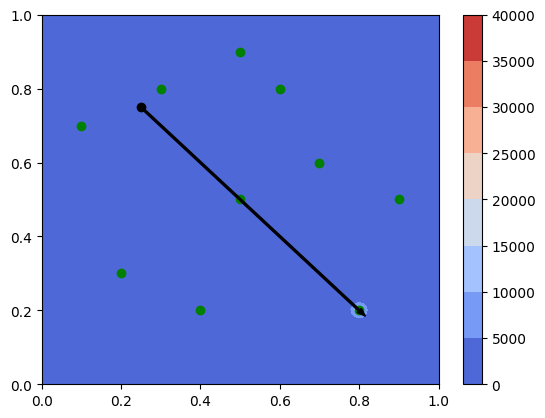

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Define potential function
def potential(q, p, w):
    return w / np.sqrt((q[0]-p[0])**2 + (q[1]-p[1])**2)

# Define positive labeled points and their weights
points = np.array([[0.5, 0.5], [0.3, 0.8], [0.7, 0.6], [0.2, 0.3], [0.8, 0.2], [0.4, 0.2], [0.6, 0.8], [0.1, 0.7], [0.9, 0.5], [0.5, 0.9]])
weights = np.array([0.5, 0.7, 0.8, 0.3, 100, 0.4, 0.6, 0.4, 0.3, 0.7])

# Define x and y ranges and create grid
x_range = np.linspace(0, 1, 100)
y_range = np.linspace(0, 1, 100)
xx, yy = np.meshgrid(x_range, y_range)

# Calculate gravitational potential at each point on the grid
potential_grid = np.zeros(xx.shape)
for i in range(len(points)):
    potential_grid += potential([xx, yy], points[i], weights[i])

# Plot gravitational potential as contour plot
plt.contourf(xx, yy, potential_grid, cmap='coolwarm')
plt.colorbar()

# Plot positive labeled points
plt.scatter(points[:, 0], points[:, 1], c='g')

# Add a query point
q = np.array([0.25, 0.75])
plt.scatter(q[0], q[1], c='k')

# Calculate gravitational potential at query point
potentials = np.array([potential(q, p, w) for p, w in zip(points, weights)])

# Find the nearest positive labeled point
nearest_point = points[np.argmax(potentials)]

# Calculate gradient of potential at q
dy, dx = np.gradient(potential_grid, y_range, x_range)
gradient = np.array([dy[int(q[1]*100), int(q[0]*100)], dx[int(q[1]*100), int(q[0]*100)]])

# Normalize gradient to unit length
gradient /= np.sqrt(gradient[0]**2 + gradient[1]**2)

# Plot directed vector from q to nearest positive labeled point
plt.arrow(q[0], q[1], nearest_point[0]-q[0], nearest_point[1]-q[1], color='k', width=0.005)
plt.show()
